# Analyzing Business.json

Firstly importing all the libraries that we need

In [1]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, JSON file I/O (e.g. pd.read_json)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import json
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import os
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from textblob import TextBlob
# import ploty for visualization
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Now that we have imported the libraries, I am going to read the datasets with pandas.

In [2]:
df_businesses = pd.read_json('../input/yelp_academic_dataset_business.json', lines=True)

This is how the Business dataset looks like

In [3]:
df_businesses.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [4]:
print('In total there are ', df_businesses.isnull().sum().sum(), ' missing values')
print('Missing values on each column:')
df_businesses.apply(lambda x: sum(x.isnull()),axis=0)

In total there are  74148  missing values
Missing values on each column:


address             0
attributes      28836
business_id         0
categories        482
city                0
hours           44830
is_open             0
latitude            0
longitude           0
name                0
postal_code         0
review_count        0
stars               0
state               0
dtype: int64

In [5]:
print("1 for Opened Businesses - 0 for Closed Businesses")
df_businesses['is_open'].value_counts()

1 for Opened Businesses - 0 for Closed Businesses


1    158525
0     34084
Name: is_open, dtype: int64

In [6]:
print('Let\'s analyze the ratings of businesses')
df_businesses.stars.describe()

Let's analyze the ratings of businesses


count    192609.000000
mean          3.585627
std           1.018458
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

Text(0.5, 1.0, 'Businesses by Stars')

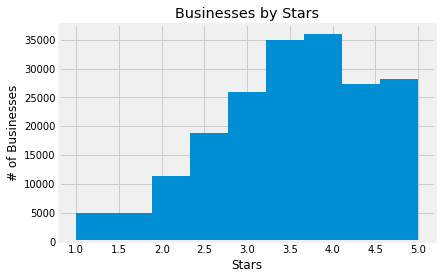

In [7]:
plt.hist(df_businesses.stars, bins=np.linspace(1,5,10))
plt.xlabel('Stars')
plt.ylabel('# of Businesses')
plt.title('Businesses by Stars')

Since there are many different Business on this dataset, we only want to work with Restaurants.
Lets filter them out

In [8]:
print('All businesses: ',df_businesses.shape)
df_businesses.fillna('NA', inplace=True)
df_businesses = df_businesses[df_businesses['categories'].str.contains('Restaurants')]
print('After we have filtered only Restaurants: ',df_businesses.shape)

All businesses:  (192609, 14)
After we have filtered only Restaurants:  (59371, 14)


There are a total of 59371 Restaurants. I also checked for the empty values and I could have removed them but I filled them inplace with NA. Lets see them

In [9]:
df_businesses[df_businesses['attributes'].str.contains('NA') | df_businesses['categories'].str.contains('NA') | df_businesses['hours'].str.contains('NA')]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,NA,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
23,"Center Core - Food Court, Fl 3, Pittsburgh Int...","{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,NA,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA
45,2825 32 Avenue NE,"{'BusinessParking': '{'garage': False, 'street...",e_EMySqP0uwlVZfd8mRaaQ,"Chinese, Dim Sum, Restaurants",Calgary,NA,0,51.081162,-113.993474,Pearl Garden,T1Y,4,2.0,AB
61,"17205 Leslie Street, Unit 2","{'RestaurantsAttire': ''casual'', 'Restaurants...",6l00a9Gkxkcp_y-GPjYBiw,"Fish & Chips, Restaurants",Newmarket,NA,1,44.058765,-79.429115,J's Fish & Chips,L3Y 8Y8,12,4.5,ON
75,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,NA,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV
83,619 Mount Pleasant Road,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...",RFbMVekR8lU9tPJ8sWrwHg,"Italian, Restaurants",Toronto,NA,1,43.704229,-79.388230,Tavolino,M4S 2M5,18,4.0,ON
111,4343 N Rancho Dr,NA,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,NA,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV
133,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,NA,1,33.446805,-112.097129,Vals Getaway DES Cafeteria,85007,14,3.0,AZ
139,1634 Bayview Ave,NA,1HRSElW1HgBiTtSNrhjMeA,"Restaurants, Vietnamese",Toronto,NA,0,43.706691,-79.375803,Fine Asian Bowl,M4G 3B7,4,2.0,ON
146,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,NA,0,33.261325,-111.790815,New Mexican Grill,85286,84,4.0,AZ


Lets see how the filtered dataset with only Restaurnats looks like

In [10]:
df_businesses

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,NA,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
23,"Center Core - Food Court, Fl 3, Pittsburgh Int...","{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,NA,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA
25,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
29,1170 Queen Street W,"{'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...",NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON
32,1051 Bloor Street W,"{'BusinessParking': '{'garage': False, 'street...",SP_YXIEwkFPPl_9anCYmpQ,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,"{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON
35,6401 Morrison Blvd,"{'Alcohol': 'u'full_bar'', 'BusinessAcceptsCre...",BvYU3jvGd0TJ7IyZdfiN2Q,"Sandwiches, Italian, American (Traditional), A...",Charlotte,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC


In [11]:
print("1 for Opened Restaurants - 0 for Closed Restaurants")
df_businesses['is_open'].value_counts()

1 for Opened Restaurants - 0 for Closed Restaurants


1    42237
0    17134
Name: is_open, dtype: int64

In [12]:
print('Let\'s analyze the ratings of Restaurants')
df_businesses.stars.describe()

Let's analyze the ratings of Restaurants


count    59371.000000
mean         3.441790
std          0.803304
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

Lets see how many different states are there

In [13]:
print('There are a total of {} states where there are Restaurants'.format(len(df_businesses['state'].unique())))
df_businesses['state'].unique()

There are a total of 26 states where there are Restaurants


array(['ON', 'NC', 'AZ', 'OH', 'NV', 'PA', 'AB', 'QC', 'WI', 'IL', 'NY',
       'SC', 'NM', 'VA', 'NE', 'CA', 'WA', 'XWY', 'CON', 'TX', 'BC', 'VT',
       'XGM', 'AR', 'FL', 'AL'], dtype=object)

Check the number of Restaurants on each state

In [14]:
df_businesses['state'].value_counts()

ON     14831
AZ     11465
NV      7783
QC      5622
OH      5522
NC      4326
PA      4001
AB      3035
WI      1703
IL       672
SC       384
NY        12
XWY        2
NM         1
BC         1
NE         1
WA         1
VA         1
VT         1
AL         1
CON        1
TX         1
CA         1
FL         1
AR         1
XGM        1
Name: state, dtype: int64

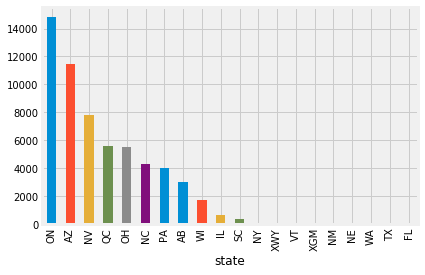

In [15]:
df_states = df_businesses.groupby('state').count()
df_top_states = df_states['name']
df_top_states_sorted = df_top_states.sort_values(ascending = False)
df_top_states_sorted[:20].plot(kind = 'bar')

Lets see how many different cities are there

In [16]:
print('There are a total of {} cities where there are Restaurants'.format(len(df_businesses['city'].unique())))
df_businesses['city'].unique()

There are a total of 782 cities where there are Restaurants


array(['Mississauga', 'Charlotte', 'Phoenix', 'Mentor-on-the-Lake',
       'Las Vegas', 'Pittsburgh', 'Toronto', 'Calgary', 'Newmarket',
       'West Mifflin', 'Etobicoke', 'Montréal', 'North Olmsted', 'Hudson',
       'Chandler', 'Concord', 'Henderson', 'Scottsdale',
       'Whitchurch-Stouffville', 'Gastonia', 'Madison', 'Laval',
       'Davidson', 'Pickering', 'Cleveland', 'Mesa', 'Richmond Hill',
       'Mentor', 'North York', 'Boulder City', 'Beachwood', 'Markham',
       'Murrysville', 'Middleton', 'Tottenham', 'Champaign', 'Peoria',
       'Wexford', 'Brunswick', 'Monroe', 'Scarborough', 'Oakville',
       'Brampton', 'Urbana', 'Glendale', 'Dollard-des-Ormeaux',
       'Pointe-Aux-Trembles', 'Stow', 'Mint Hill', 'Elyria',
       'Indian Trail', 'Kirkland', 'Matthews', 'Cave Creek', 'Akron',
       'Surprise', 'Fitchburg', 'Montreal', 'Goodyear', 'Willoughby',
       'Canonsburd', 'Champlain', 'Gilbert', 'Pineville', 'Sun City',
       'Ajax', 'Burton', 'West Homestead', 'Parma',

Check the number of Restaurants on each city

In [17]:
df_businesses['city'].value_counts()

Toronto                           7964
Las Vegas                         6450
Phoenix                           3999
Montréal                          3784
Calgary                           2912
Charlotte                         2710
Pittsburgh                        2453
Scottsdale                        1573
Cleveland                         1495
Mississauga                       1447
Mesa                              1167
Madison                           1128
Tempe                             1044
Henderson                          885
Chandler                           866
Markham                            845
Glendale                           720
Gilbert                            577
Brampton                           546
Scarborough                        514
Richmond Hill                      503
Vaughan                            474
North York                         461
Champaign                          425
Peoria                             365
North Las Vegas          

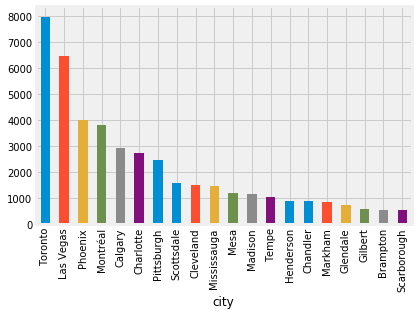

In [18]:
df_cities = df_businesses.groupby('city').count()
df_top_cities = df_cities['name']
df_top_cities_sorted = df_top_cities.sort_values(ascending = False)
df_top_cities_sorted[:20].plot(kind = 'bar')

Now lets see the reviews and ratings for Restaurants

Text(0.5, 1.0, 'Restaurants by Review Count')

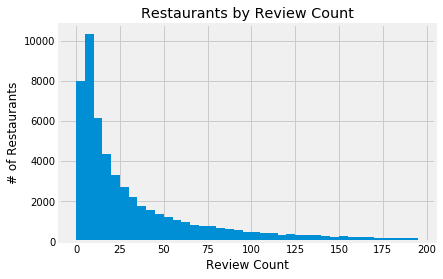

In [19]:
plt.hist(df_businesses.review_count, bins=range(0,200,5))
plt.xlabel('Review Count')
plt.ylabel('# of Restaurants')
plt.title('Restaurants by Review Count')

Text(0.5, 1.0, 'Restaurants by Stars')

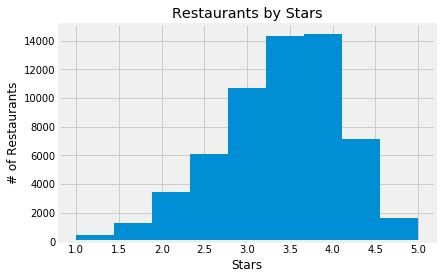

In [20]:
plt.hist(df_businesses.stars, bins=np.linspace(1,5,10))
plt.xlabel('Stars')
plt.ylabel('# of Restaurants')
plt.title('Restaurants by Stars')

Lets see what we dont need anymore so we can delete them from Memory.

In [21]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_businesses', 84915489),
 ('df_cities', 136419),
 ('df_top_cities', 61347),
 ('df_top_cities_sorted', 61347),
 ('STOPWORDS', 8416),
 ('df_states', 4513),
 ('df_top_states', 2017),
 ('df_top_states_sorted', 2017),
 ('AngularAxis', 1056),
 ('Annotation', 1056),
 ('Annotations', 1056),
 ('Area', 1056),
 ('Bar', 1056),
 ('Barpolar', 1056),
 ('Box', 1056),
 ('Candlestick', 1056),
 ('Carpet', 1056),
 ('Choropleth', 1056),
 ('ColorBar', 1056),
 ('Cone', 1056),
 ('Contour', 1056),
 ('Contourcarpet', 1056),
 ('Contours', 1056),
 ('Counter', 1056),
 ('Data', 1056),
 ('ErrorX', 1056),
 ('ErrorY', 1056),
 ('ErrorZ', 1056),
 ('Figure', 1056),
 ('FigureWidget', 1056),
 ('Font', 1056),
 ('Frame', 1056),
 ('Frames', 1056),
 ('Heatmap', 1056),
 ('Heatmapgl', 1056),
 ('Histogram', 1056),
 ('Histogram2d', 1056),
 ('Histogram2dContour', 1056),
 ('Histogram2dcontour', 1056),
 ('Isosurface', 1056),
 ('Layout', 1056),
 ('Legend', 1056),
 ('Line', 1056),
 ('Margin', 1056),
 ('Marker', 1056),
 ('Mesh3d', 

Lets delete this dataframes df_cities,df_top_cities,df_top_cities_sorted,df_states,df_top_states,df_top_states_sorted because we dont need them anymore

In [22]:
del df_cities,df_top_cities,df_top_cities_sorted,df_states,df_top_states,df_top_states_sorted
gc.collect()

42

In [23]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_businesses', 84915489),
 ('STOPWORDS', 8416),
 ('AngularAxis', 1056),
 ('Annotation', 1056),
 ('Annotations', 1056),
 ('Area', 1056),
 ('Bar', 1056),
 ('Barpolar', 1056),
 ('Box', 1056),
 ('Candlestick', 1056),
 ('Carpet', 1056),
 ('Choropleth', 1056),
 ('ColorBar', 1056),
 ('Cone', 1056),
 ('Contour', 1056),
 ('Contourcarpet', 1056),
 ('Contours', 1056),
 ('Counter', 1056),
 ('Data', 1056),
 ('ErrorX', 1056),
 ('ErrorY', 1056),
 ('ErrorZ', 1056),
 ('Figure', 1056),
 ('FigureWidget', 1056),
 ('Font', 1056),
 ('Frame', 1056),
 ('Frames', 1056),
 ('Heatmap', 1056),
 ('Heatmapgl', 1056),
 ('Histogram', 1056),
 ('Histogram2d', 1056),
 ('Histogram2dContour', 1056),
 ('Histogram2dcontour', 1056),
 ('Isosurface', 1056),
 ('Layout', 1056),
 ('Legend', 1056),
 ('Line', 1056),
 ('Margin', 1056),
 ('Marker', 1056),
 ('Mesh3d', 1056),
 ('Ohlc', 1056),
 ('Parcats', 1056),
 ('Parcoords', 1056),
 ('Pie', 1056),
 ('Pointcloud', 1056),
 ('RadialAxis', 1056),
 ('Sankey', 1056),
 ('Scatter', 1056),

# Analyzing Review.json and Tip.json

Yelp is a collection of different business in different areas. In Yelp the most popular business is Restaurants business. Yelp has a huge collection of restaurants. I take top 20 most occurrences restaurants and calculate their mean of ratings reviews polarity and plot them and see which is most popular restaurants since it's quite impossible to plot that thousands of business ratings. 

In [24]:
df_reviews_dir = pd.read_json('../input/yelp_academic_dataset_review.json', chunksize=100000, lines=True)
df_tips = pd.read_json('../input/yelp_academic_dataset_tip.json', lines=True)

Because reviews are too big, we will read them in chunks, and make sure we only take reviews for the Restaurants that we filtered earlier. I choose 10 chunks, (larger numbers will give MemoryError).

In [25]:
df_reviews = pd.DataFrame()
i=0
for df in df_reviews_dir:
    df = df[df['business_id'].isin(df_businesses['business_id'])]
    df_reviews = pd.concat([df_reviews, df])
    i=i+1
    print(i)
    if i==10: break

1
2
3
4
5
6
7
8
9
10


In [26]:
print('Reviews: ',df_reviews.shape)
print('Tips: ',df_tips.shape)

Reviews:  (633592, 9)
Tips:  (1223094, 5)


Lets check the ratings on reviews

In [27]:
df_reviews["stars"].value_counts()

5    251455
4    165400
3     84372
1     73609
2     58756
Name: stars, dtype: int64

Text(0.5, 1.0, 'Reviews by Stars')

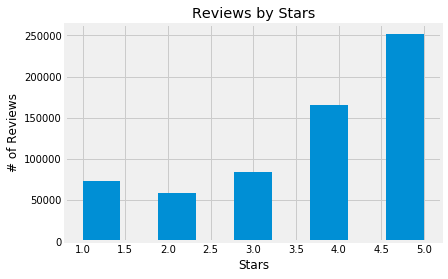

In [28]:
plt.hist(df_reviews.stars, bins=np.linspace(1,5,10))
plt.xlabel('Stars')
plt.ylabel('# of Reviews')
plt.title('Reviews by Stars')

Lets analyze the columns of reviews

In [29]:
df_reviews.describe()

,cool,funny,stars,useful
count,633592.000000,633592.000000,633592.000000,633592.000000
mean,0.559714,0.451844,3.729706,1.105328
std,2.149577,2.512431,1.368764,3.297202
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,1.000000
max,207.000000,440.000000,5.000000,650.000000


In [30]:
print('Missing values of Reviews dataset ', df_reviews.isnull().sum().sum())
print('Missing values of Tips dataset ', df_tips.isnull().sum().sum())

Missing values of Reviews dataset  0
Missing values of Tips dataset  0


Make sure we only get businesses that are in our review list and delete the rest, since we dont have reviews for them.

In [31]:
df_businesses = df_businesses[df_businesses['business_id'].isin(df_reviews['business_id'])]

In [32]:
print('Final businesses shape: ', df_businesses.shape)
print('Final review shape: ', df_reviews.shape)

Final businesses shape:  (11646, 14)
Final review shape:  (633592, 9)


Since Review dataset doesnt have Business name but only Business id, lets add the name column in Review dataset too, after that I will do a text cleansing and add it to another column called cleared_text. And then I will select 20 Restaurants which have more reviews, and put them in a new dataframe, then I will calculate the mean of Ratings for each Restaurant

In [33]:
df_reviews['name'] = df_reviews['business_id'].map(df_businesses.set_index('business_id')['name'])

Lets also see the Reviews with the added column name

In [34]:
def preprocess(text):
    text = re.sub('[^a-z\s]', '', text.lower())                  # get rid of noise
    text = [word for word in text.split() if word not in set(stopwords)]  # remove stopwords
    return ' '.join(text) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)

df_reviews['cleared_text'] = df_reviews['text'].apply(preprocess)

In [35]:
df_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,cleared_text
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg,Regal Beagle Pub,went lunch steak sandwich delicious caesar sal...
5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,ill first admit excited going la tavolta food ...
6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ,Tracy Dessert,tracy dessert big name hong kong one first mar...
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA,FOX Sports Grill,place gone hill clearly cut back staff food qu...
10,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,"Like walking back in time, every Saturday morn...",0,FIk4lQQu1eTe2EpzQ4xhBA,Pinball Hall Of Fame,like walking back time every saturday morning ...
11,mRUVMJkUGxrByzMQ2MuOpA,0,2017-12-15 23:27:08,1,-I5umRTkhw15RqpKMl_o1Q,1,"Walked in around 4 on a Friday afternoon, we s...",0,-mA3-1mN4JIEkqOtdbNXCQ,Beast of Bourbon Bar & Grill,walked around friday afternoon sat table bar w...
12,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw,Pazzo,wow surprised one two star reviews started ten...
14,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,Pho Phuong,cannot believe things changed years picked duc...
15,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw,Jz's Pizza,cant really find anything wrong place pastas p...
16,NyLYY8q1-H3hfsTwuwLPCg,0,2015-01-03 22:47:34,0,1wVA2-vQIuW_ClmXkDxqMQ,4,Great lunch today. Staff was very helpful in a...,0,86J5DwcFk4f4In1Vxe2TvA,Choolaah Indian BBQ,great lunch today staff helpful assisting sele...


Lets get all reviews for top 20 restaurants and calculate the mean of their rating

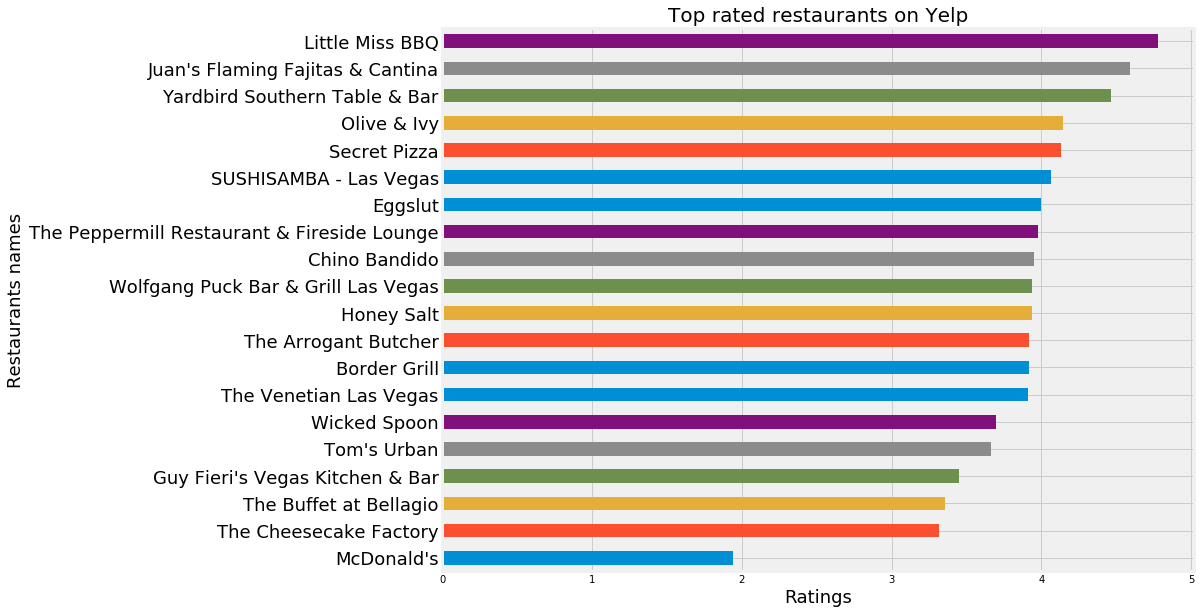

In [36]:
top_restaurants = df_reviews.name.value_counts().index[:20].tolist()
df_top_reviews = df_reviews.loc[df_reviews['name'].isin(top_restaurants)]
df_top_reviews.groupby(df_top_reviews.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

Lets select One specific Restaurant by business_id and see its reviews

In [37]:
specific_restaurant_reviews = 'QXAEGFB4oINsVuTFxEYKFQ'

df_specific_restaurant_reviews = df_reviews[df_reviews['business_id'] == specific_restaurant_reviews]

In [38]:
df_specific_restaurant_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,cleared_text
8609,QXAEGFB4oINsVuTFxEYKFQ,0,2017-01-27 21:54:30,2,6W0MQHmasK0IsaoDo4bmkw,3,My girlfriend and I went for dinner at Emerald...,3,2K62MJ4CJ19L8Tp5pRfjfQ,Emerald Chinese Restaurant,girlfriend went dinner emerald chinese thursda...
17253,QXAEGFB4oINsVuTFxEYKFQ,0,2013-06-24 23:11:30,0,BeeBfUxvzD4qNX4HxrgA5g,3,We've always been there on a Sunday so we were...,0,A0kENtCCoVT3m7T35zb2Vg,Emerald Chinese Restaurant,weve always sunday hoping saturday dim sum wou...
23456,QXAEGFB4oINsVuTFxEYKFQ,0,2016-01-04 12:59:22,0,A1D2kUnZ0HTroFreAheNSg,3,"***No automatic doors, not baby friendly!*** I...",0,SuOLY03LW5ZcnynKhbTydA,Emerald Chinese Restaurant,automatic doors baby friendly frequent chinese...
24704,QXAEGFB4oINsVuTFxEYKFQ,0,2014-05-09 02:38:43,0,2pf45Stf-pNew-xgTababQ,1,"Horrible service,\nI went there tonight with m...",1,lymyUak6KNcNKoDbK87MiQ,Emerald Chinese Restaurant,horrible service went tonight boyfriend hes pa...
30636,QXAEGFB4oINsVuTFxEYKFQ,2,2011-03-21 14:39:55,1,RHhlmL07evgAdPaXQV8Omg,4,One of the gauges of a good Chinese restaurant...,2,6vU0I5XgCv9OQHZ76rV6qw,Emerald Chinese Restaurant,one gauges good chinese restaurant number chin...
31002,QXAEGFB4oINsVuTFxEYKFQ,0,2016-08-13 20:31:21,0,fhbL1BO2TCYKpoDLf-3mcg,4,"I've been a frequent at this place for years, ...",0,nyL_LfmAaf15o8aj7WHnPw,Emerald Chinese Restaurant,ive frequent place years enough managers prett...
33867,QXAEGFB4oINsVuTFxEYKFQ,0,2015-02-17 00:10:02,0,TD5E5NTFqgi1LPbTLlRCjQ,3,We chose this restaurant for our Chinese New Y...,0,-ga7pQvnJcMB1_pIapHQRQ,Emerald Chinese Restaurant,chose restaurant chinese new year dinner menu ...
39125,QXAEGFB4oINsVuTFxEYKFQ,0,2017-01-02 20:32:29,0,4Sg_ziTcrYlGO0dVyj2V3g,1,I went at 230 on a Monday. It was dimsum \n\nI...,2,agqWketq-FhYwVmRyli4jA,Emerald Chinese Restaurant,went monday dimsum hated every second carts go...
39312,QXAEGFB4oINsVuTFxEYKFQ,1,2016-01-18 17:49:39,0,PNF0KXB9-RJMveiLvgkASw,3,My family and I were at Emerald yesterday duri...,0,02AgiiwLg_XAhkvG-wGZKQ,Emerald Chinese Restaurant,family emerald yesterday busiest point dim sum...
40976,QXAEGFB4oINsVuTFxEYKFQ,0,2015-08-20 03:31:45,0,ijWqxLnjOo9LZpxOVGgCnw,4,"Because we are in Mississauga, I think this pl...",0,paYZw5wsS25IzzBZtijB8A,Emerald Chinese Restaurant,mississauga think place pretty good compare di...


Now lets add sentiment polarity for Restaurants with most Reviews

In [39]:
def sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity

df_top_reviews['sentiment_polarity'] = df_top_reviews['cleared_text'].apply(sentiment)

Now lets see the dataset

In [40]:
df_top_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,cleared_text,sentiment_polarity
17,cHdJXLlKNWixBXpDwEGb_A,1,2015-04-01 16:30:00,7,6BnQwlxRn7ZuWdzninM9sQ,3,I love chinese food and I love mexican food. W...,1,JSrP-dUmLlwZiI7Dp3PQ2A,Chino Bandido,love chinese food love mexican food go wrong c...,-0.061672
23,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,Pick any meat on the planet and the chef will ...,0,2mxBNBeFrgDszqGS5tdEHA,Border Grill,pick meat planet chef make mexican style dish ...,0.375000
35,N0apJkxIem2E8irTBRKnHw,0,2015-01-18 15:30:50,0,wOv7JiO0EGcJ61P2JcDS1g,2,Went here last weekend and was pretty disappoi...,0,en0xQXlvRk-ZtKlaW4I8eQ,Wolfgang Puck Bar & Grill Las Vegas,went last weekend pretty disappointed one thin...,0.158296
37,IMLrj2klosTFvPRLv56cng,1,2014-10-11 03:50:27,1,JIC8qNMbcAPAzQMPrtsTJw,4,Dinner Was Fantastic! Service was great We sta...,1,fxrQSMhHlBv6eJVRdchG9Q,Honey Salt,dinner fantastic service great started corn so...,0.408333
44,ujHiaprwCQ5ewziu0Vi9rw,0,2013-12-07 00:14:06,0,f0B9-r14-bLudyu5S7aLhw,1,We had dinner at the Bellagio Buffet last nigh...,1,SvMGr_Oih7ivtzmnCL-Tmg,The Buffet at Bellagio,dinner bellagio buffet last night service ok s...,0.026369
83,yNPh5SO-7wr8HPpVCDPbXQ,0,2017-04-30 05:32:05,0,JYdhCDyR6lYfN2qnSspLlQ,5,First off food is DELICIOUS! By far my favorit...,0,6kEFHccntnYMF_7cdqCcKg,The Arrogant Butcher,first food delicious far favorite restaurant d...,0.406303
85,HhVmDybpU7L50Kb5A0jXTg,0,2015-03-06 07:24:15,0,29S2A-Q8Vt4a-Z6St1dcWw,4,Wonderful experience. We sat outside on the pa...,0,J6YedGZVdhagKKaIqgzIAw,Guy Fieri's Vegas Kitchen & Bar,wonderful experience sat outside patio watched...,0.321905
98,XXW_OFaYQkkGOGniujZFHg,0,2018-02-23 23:07:48,0,kQAHUQ89fIZVCf1cFKDE_Q,4,"""Good morning, cocktails for you?"" \nWait...wh...",0,dL1qnksdX2LW4DbNI9XNoA,The Peppermill Restaurant & Fireside Lounge,good morning cocktails waitwhat ohits vegas di...,0.400833
99,HhVmDybpU7L50Kb5A0jXTg,0,2016-01-30 01:08:03,0,jdDxglqBqPJPYQO5QlY8pA,5,Hands down best Bloody Mary ever. So many thin...,0,2Klw_6aXH_aVcOXPiFHRzg,Guy Fieri's Vegas Kitchen & Bar,hands best bloody mary ever many things bm veg...,0.306667
178,faPVqws-x-5k2CQKDNtHxw,0,2018-08-04 20:22:15,0,w1I8U4cJ4QGaXA98ImNrbA,5,"Service was amazing, Christina was extremely t...",0,rJNdeta-dYO2YcJ3u5JxnA,Yardbird Southern Table & Bar,service amazing christina extremely tentative ...,0.222321


Lets calculate the mean of sentiment polarity for each restaurant

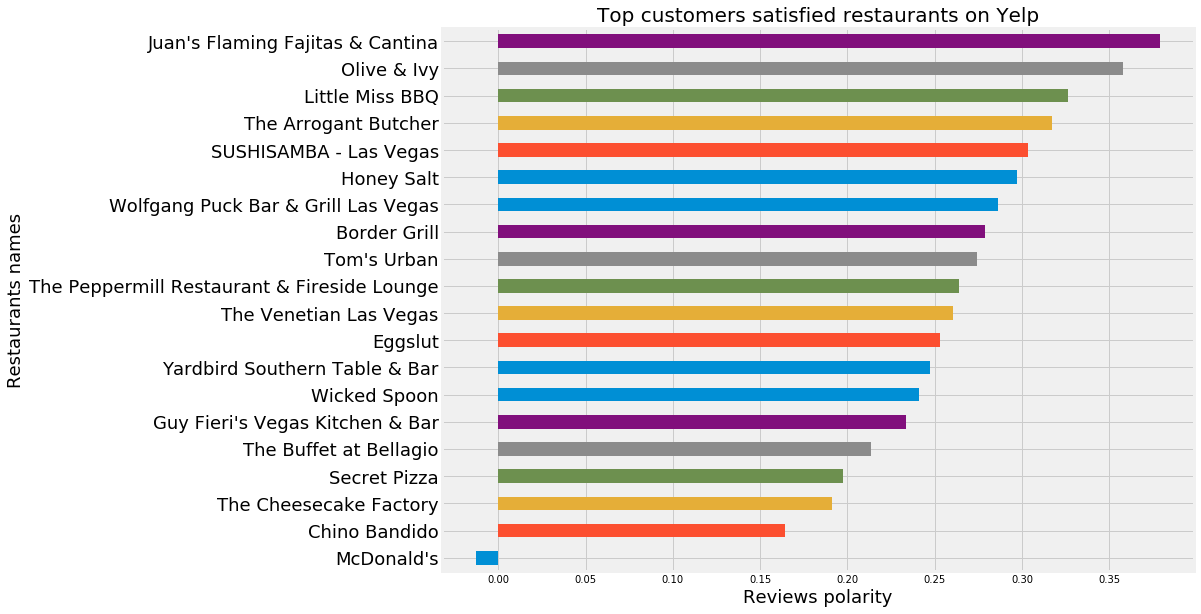

In [41]:
df_top_reviews.groupby(df_top_reviews.name)['sentiment_polarity'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top customers satisfied restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Reviews polarity', fontsize=18)
plt.show()

Lets check the mean of useful, funny and cool of each Restaurant

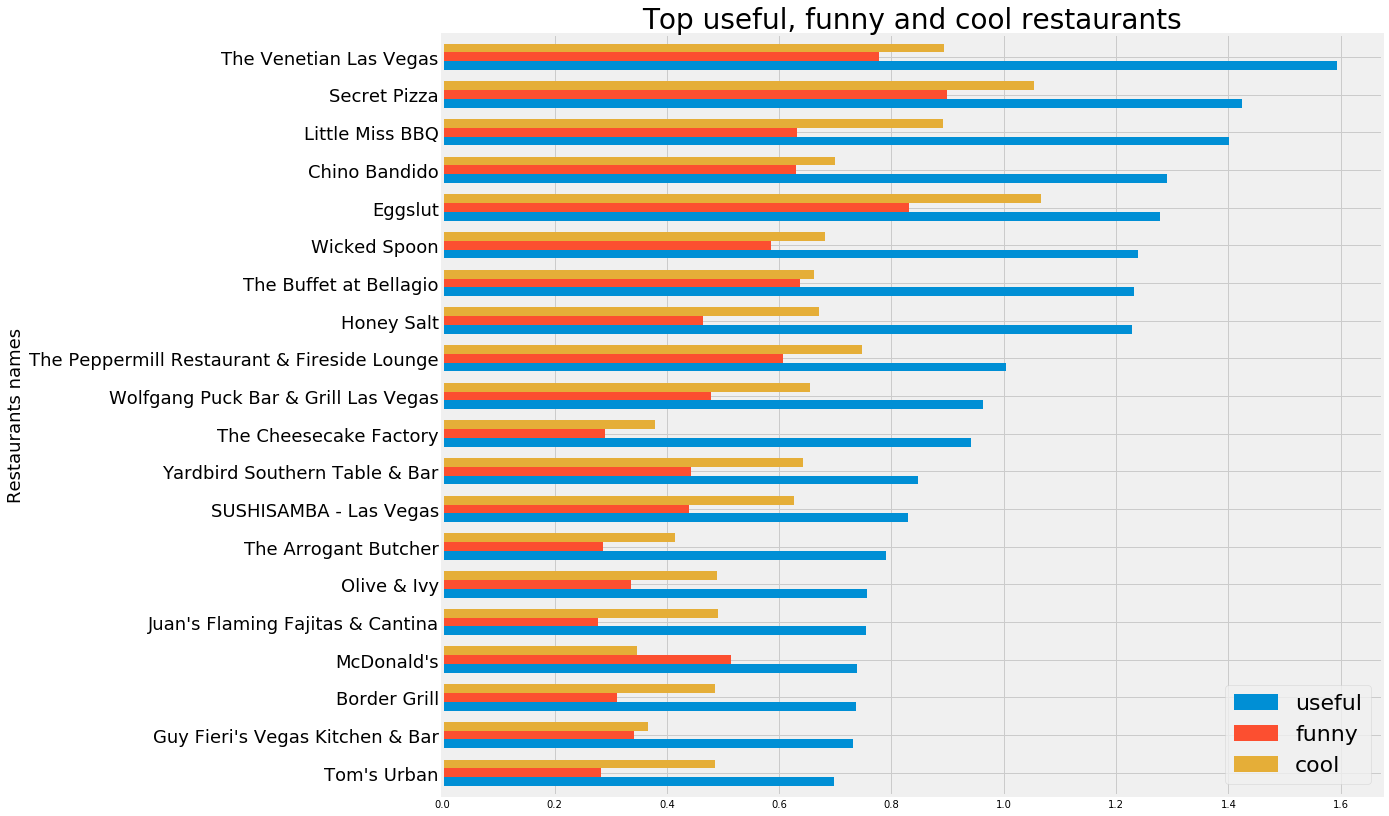

In [42]:
df_top_reviews.groupby(df_top_reviews.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=True).plot(kind='barh', figsize=(15, 14),width=0.7)
plt.yticks(fontsize=18)
plt.title('Top useful, funny and cool restaurants',fontsize=28)
plt.ylabel('Restaurants names', fontsize=18)
plt.legend(fontsize=22)
plt.show()

# Analyzing Tip.json

Since Tip dataset doesnt have Business name but only Business id, lets add the name column in Tip dataset too. And then I will select 20 Restaurants which have more tips, and put them in a new dataframe and then I will do text cleansing for Tips. 

In [43]:
df_tips['name'] = df_tips['business_id'].map(df_businesses.set_index('business_id')['name'])
df_top_tips = df_tips.loc[df_tips['name'].isin(top_restaurants)]
df_top_tips['cleared_text'] = df_top_tips['text'].apply(preprocess)

Lets have a look in the dataset

In [44]:
df_top_tips

,business_id,compliment_count,date,text,user_id,name,cleared_text
65,yNPh5SO-7wr8HPpVCDPbXQ,0,2012-03-23 00:07:55,Yet another Business Journal event.,AIHzJz0AvTq0FxCLtBhOZA,The Arrogant Butcher,yet another business journal event
385,Wxxvi3LZbHNIDwJ-ZimtnA,0,2011-08-01 02:06:40,Lets try my luck here,YslR3U1iwphOFYqvwSZ4cQ,The Venetian Las Vegas,lets try luck
419,N0apJkxIem2E8irTBRKnHw,0,2012-05-28 13:57:59,Favorite place to eat @ The Grand,fAPfgpJo_0xvU98ocYrubA,Wolfgang Puck Bar & Grill Las Vegas,favorite place eat grand
434,Xg5qEQiB-7L6kGJ5F4K3bQ,0,2017-09-21 17:52:13,Food is outstanding and service is even better...,dfs7U8cJpU-OqvHbvhWWUg,Little Miss BBQ,food outstanding service even better great pla...
567,cHdJXLlKNWixBXpDwEGb_A,0,2010-11-29 01:14:54,Don't stress about the health inspector's repo...,j7nr4cRMxxgenc_ibg-Jcw,Chino Bandido,dont stress health inspectors report snickerdo...
867,I-5qHCVwT7k_KH67-YOx3A,0,2017-03-12 03:34:08,Cheesecake is,njUgJcn8ZN0BdZdNEswRwA,The Cheesecake Factory,cheesecake
940,d_L-rfS1vT3JMzgCUGtiow,1,2013-12-18 05:41:46,Sign up for their locals rewards card for disc...,UYcmGbelzRa0Q6JqzLoguw,Border Grill,sign locals rewards card discounts also sign e...
1077,uuGL8diLlHfeUeFuod3F-w,0,2015-09-05 11:17:21,Food here is decent. It's more for the happy h...,lDKbTlZqjIn2gn490gU2HQ,Tom's Urban,food decent happy hour lobster shrimp mac n ch...
1170,wUKzaS1MHg94RGM6z8u9mw,0,2010-12-10 18:56:29,Try the red sangria!,XiqziC8skzXUSc0UdNNdAA,Olive & Ivy,try red sangria
1794,cHdJXLlKNWixBXpDwEGb_A,0,2013-02-16 20:40:59,This is the most unexpected marriage of food. ...,mEiR7F_z1dyiSkCNl5calg,Chino Bandido,unexpected marriage food admit kind fun eating...


Lets see most used words in the tips

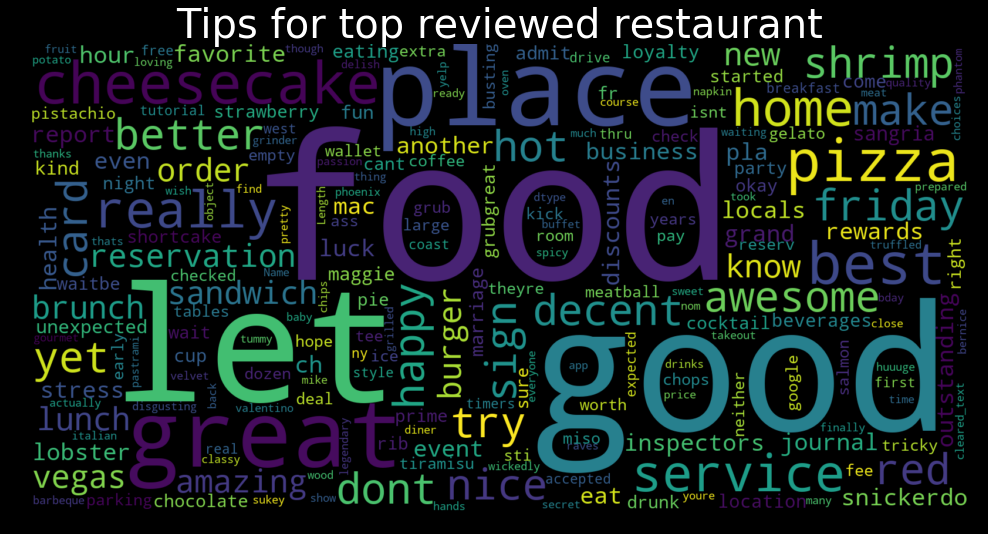

In [45]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(df_top_tips['cleared_text']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Tips for top reviewed restaurant", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

# ANALYZING SOME SPECIFIC RESTAURANTS

**Lets analyze Little Miss BBQ Restaurant Reviews and Ratings**

In [46]:
df_little_miss_bbq_only = df_businesses.loc[df_businesses['name'] == "Little Miss BBQ"]
df_little_miss_bbq_review = df_top_reviews.loc[df_top_reviews['business_id'].isin(df_little_miss_bbq_only.business_id)]

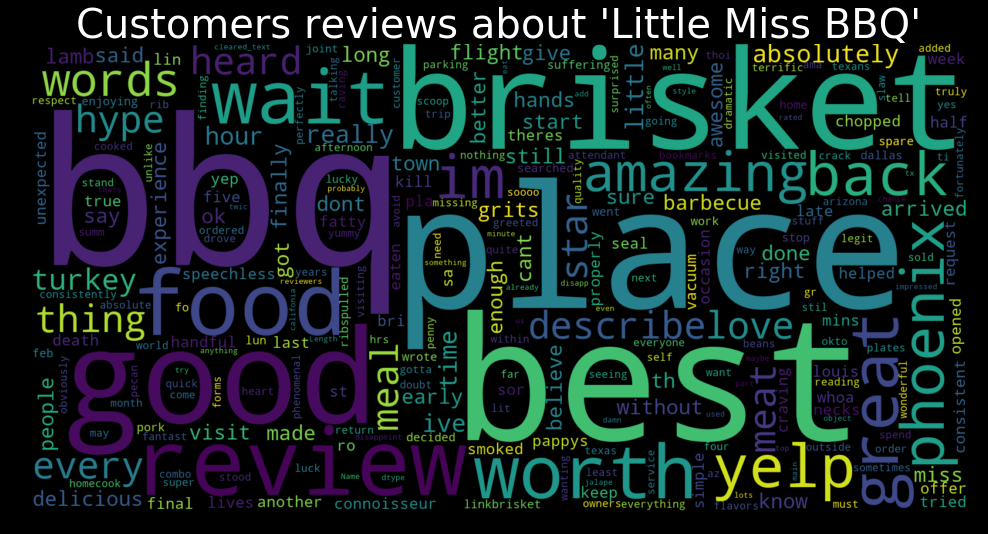

In [47]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(df_little_miss_bbq_review['cleared_text']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Customers reviews about 'Little Miss BBQ'", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

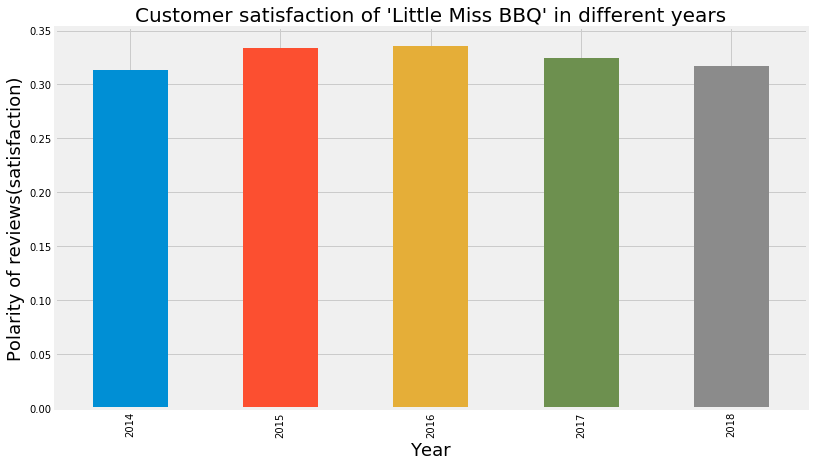

In [48]:
# convert date column to pandas datatime 
df_little_miss_bbq_review.date = pd.to_datetime(df_little_miss_bbq_review.date)
df_little_miss_bbq_review.groupby(df_little_miss_bbq_review.date.dt.year)['sentiment_polarity'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("Customer satisfaction of 'Little Miss BBQ' in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Polarity of reviews(satisfaction)', fontsize=18)
plt.show()

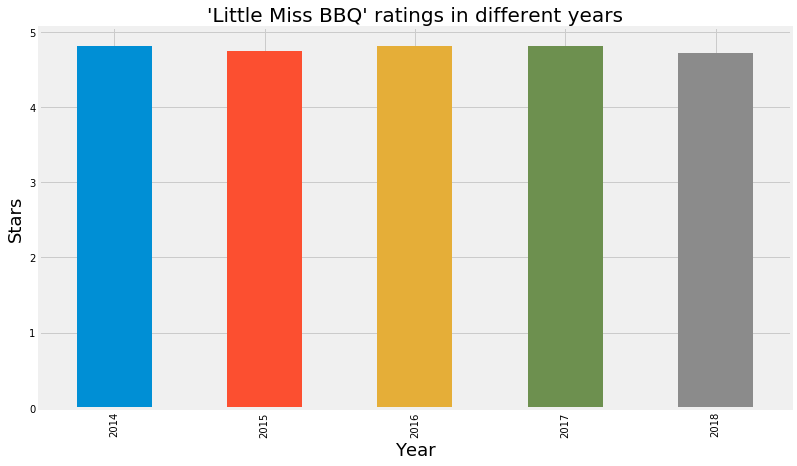

In [49]:
df_little_miss_bbq_review.date = pd.to_datetime(df_little_miss_bbq_review.date)
df_little_miss_bbq_review.groupby(df_little_miss_bbq_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'Little Miss BBQ' ratings in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

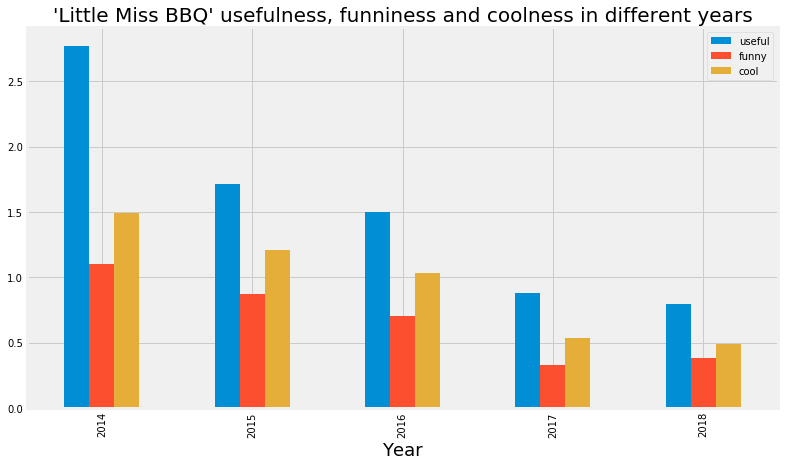

In [50]:
df_little_miss_bbq_review.date = pd.to_datetime(df_little_miss_bbq_review.date)
df_little_miss_bbq_review.groupby(df_little_miss_bbq_review.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'Little Miss BBQ' usefulness, funniness and coolness in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.show()

Lets delete the dataframe that we don't need now.

In [51]:
del df_little_miss_bbq_only,df_little_miss_bbq_review
gc.collect()

27976

**Lets analyze The Venetian Las Vegas Restaurant Reviews and Ratings**

In [52]:
df_the_venetian_las_vegas_only = df_businesses.loc[df_businesses['name'] == "The Venetian Las Vegas"]
df_the_venetian_las_vegas_review = df_top_reviews.loc[df_top_reviews['business_id'].isin(df_the_venetian_las_vegas_only.business_id)]

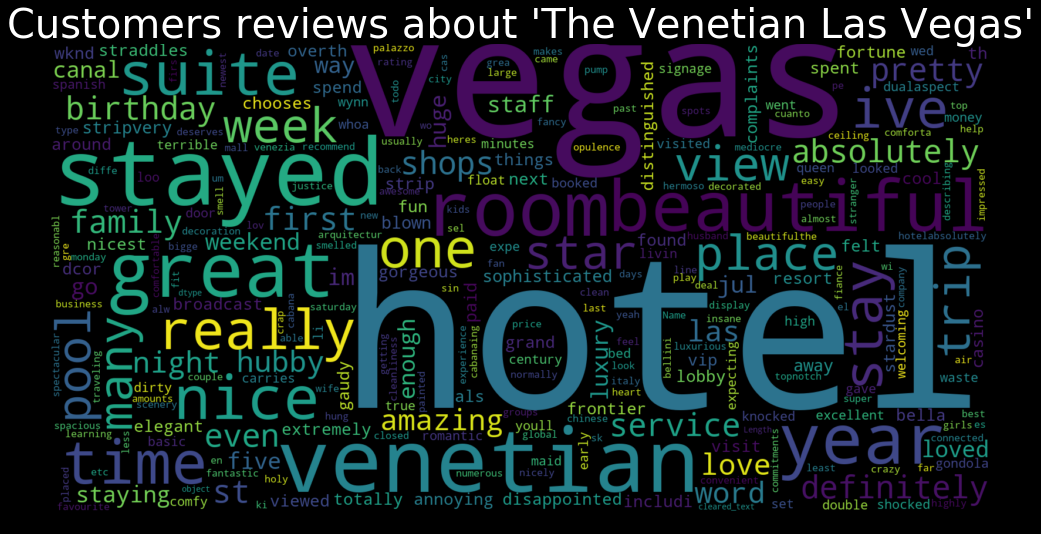

In [53]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(df_the_venetian_las_vegas_review['cleared_text']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Customers reviews about 'The Venetian Las Vegas'", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

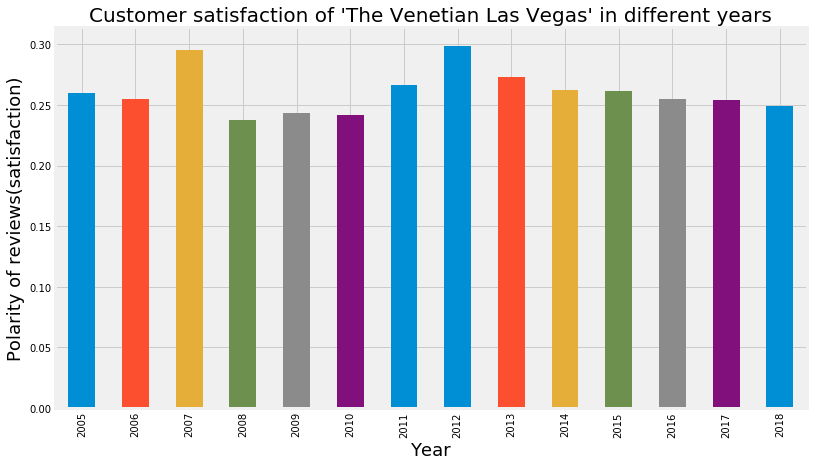

In [54]:
# convert date column to pandas datatime 
df_the_venetian_las_vegas_review.date = pd.to_datetime(df_the_venetian_las_vegas_review.date)
df_the_venetian_las_vegas_review.groupby(df_the_venetian_las_vegas_review.date.dt.year)['sentiment_polarity'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("Customer satisfaction of 'The Venetian Las Vegas' in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Polarity of reviews(satisfaction)', fontsize=18)
plt.show()

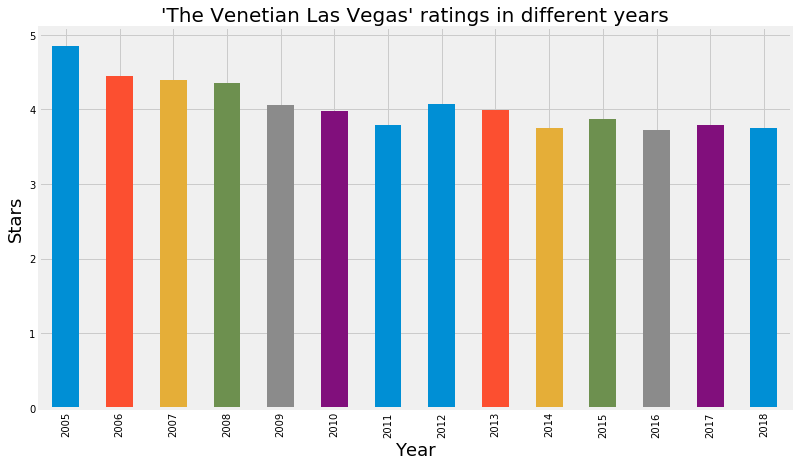

In [55]:
df_the_venetian_las_vegas_review.date = pd.to_datetime(df_the_venetian_las_vegas_review.date)
df_the_venetian_las_vegas_review.groupby(df_the_venetian_las_vegas_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'The Venetian Las Vegas' ratings in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

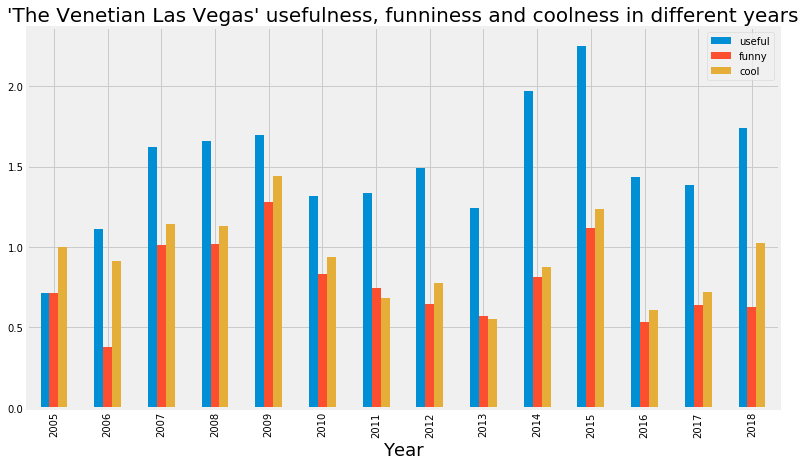

In [56]:
df_the_venetian_las_vegas_review.date = pd.to_datetime(df_the_venetian_las_vegas_review.date)
df_the_venetian_las_vegas_review.groupby(df_the_venetian_las_vegas_review.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'The Venetian Las Vegas' usefulness, funniness and coolness in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.show()

In [57]:
del df_the_venetian_las_vegas_only,df_the_venetian_las_vegas_review
gc.collect()

13373

**Lets analyze Juan's Flaming Fajitas & Cantina Restaurant Reviews and Ratings**

In [58]:
df_juans_flaming_fajitas_cantina_only = df_businesses.loc[df_businesses['name'] == "Juan's Flaming Fajitas & Cantina"]
df_juans_flaming_fajitas_cantina_review = df_top_reviews.loc[df_top_reviews['business_id'].isin(df_juans_flaming_fajitas_cantina_only.business_id)]

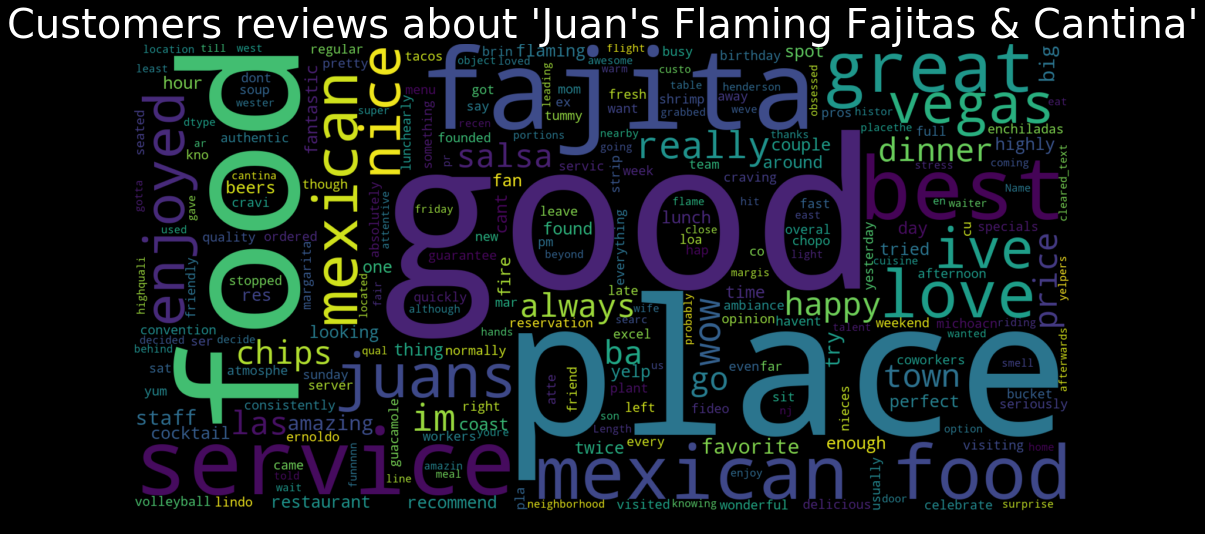

In [59]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(df_juans_flaming_fajitas_cantina_review['cleared_text']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Customers reviews about 'Juan's Flaming Fajitas & Cantina'", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

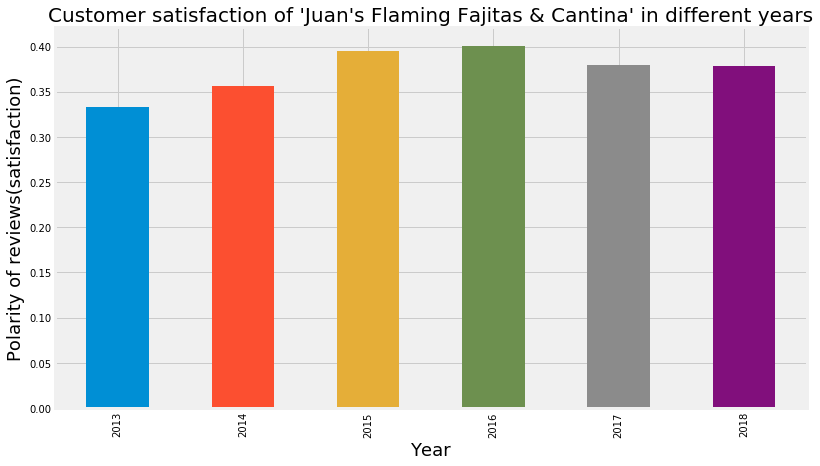

In [60]:
# convert date column to pandas datatime 
df_juans_flaming_fajitas_cantina_review.date = pd.to_datetime(df_juans_flaming_fajitas_cantina_review.date)
df_juans_flaming_fajitas_cantina_review.groupby(df_juans_flaming_fajitas_cantina_review.date.dt.year)['sentiment_polarity'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("Customer satisfaction of 'Juan's Flaming Fajitas & Cantina' in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Polarity of reviews(satisfaction)', fontsize=18)
plt.show()

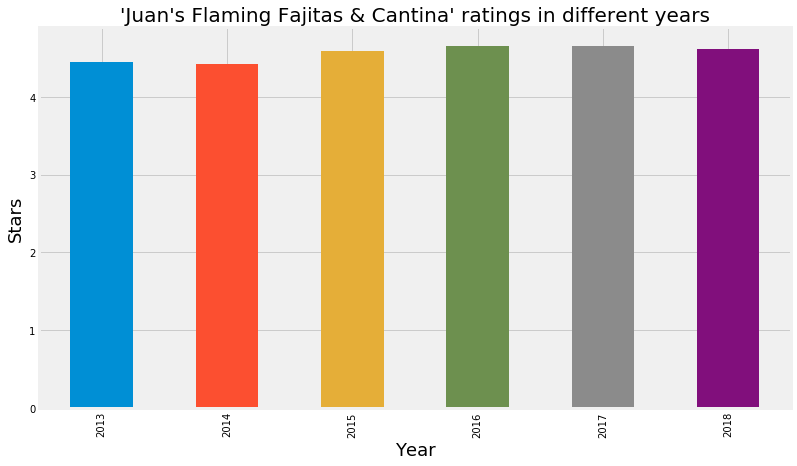

In [61]:
df_juans_flaming_fajitas_cantina_review.date = pd.to_datetime(df_juans_flaming_fajitas_cantina_review.date)
df_juans_flaming_fajitas_cantina_review.groupby(df_juans_flaming_fajitas_cantina_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'Juan's Flaming Fajitas & Cantina' ratings in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

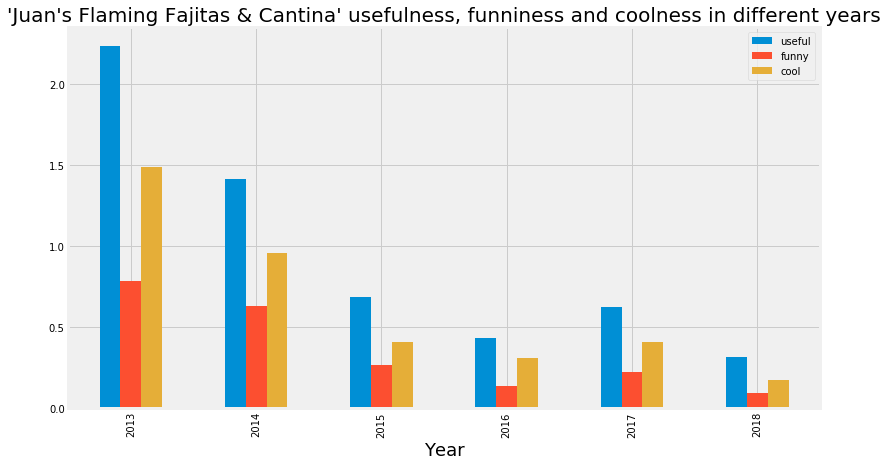

In [62]:
df_juans_flaming_fajitas_cantina_review.date = pd.to_datetime(df_juans_flaming_fajitas_cantina_review.date)
df_juans_flaming_fajitas_cantina_review.groupby(df_juans_flaming_fajitas_cantina_review.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'Juan's Flaming Fajitas & Cantina' usefulness, funniness and coolness in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.show()

In [63]:
del df_juans_flaming_fajitas_cantina_only,df_juans_flaming_fajitas_cantina_review,df_top_reviews,df_tips,df_top_tips
gc.collect()

10178

Lets see what we dont need anymore so we can delete them from Memory.

In [64]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_reviews', 899799734),
 ('df', 59370599),
 ('df_businesses', 16673673),
 ('df_specific_restaurant_reviews', 222164),
 ('STOPWORDS', 8416),
 ('stopwords', 8416),
 ('WordCloud', 2000),
 ('i', 1672),
 ('TextBlob', 1184),
 ('AngularAxis', 1056),
 ('Annotation', 1056),
 ('Annotations', 1056),
 ('Area', 1056),
 ('Bar', 1056),
 ('Barpolar', 1056),
 ('Box', 1056),
 ('Candlestick', 1056),
 ('Carpet', 1056),
 ('Choropleth', 1056),
 ('ColorBar', 1056),
 ('Cone', 1056),
 ('Contour', 1056),
 ('Contourcarpet', 1056),
 ('Contours', 1056),
 ('Counter', 1056),
 ('Data', 1056),
 ('ErrorX', 1056),
 ('ErrorY', 1056),
 ('ErrorZ', 1056),
 ('Figure', 1056),
 ('FigureWidget', 1056),
 ('Font', 1056),
 ('Frame', 1056),
 ('Frames', 1056),
 ('Heatmap', 1056),
 ('Heatmapgl', 1056),
 ('Histogram', 1056),
 ('Histogram2d', 1056),
 ('Histogram2dContour', 1056),
 ('Histogram2dcontour', 1056),
 ('Isosurface', 1056),
 ('Layout', 1056),
 ('Legend', 1056),
 ('Line', 1056),
 ('Margin', 1056),
 ('Marker', 1056),
 ('Mesh

In [65]:
del df,df_reviews_dir,df_specific_restaurant_reviews,top_restaurants, specific_restaurant_reviews
gc.collect()

14

In [66]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_reviews', 899799734),
 ('df_businesses', 16673673),
 ('STOPWORDS', 8416),
 ('stopwords', 8416),
 ('WordCloud', 2000),
 ('i', 1672),
 ('TextBlob', 1184),
 ('AngularAxis', 1056),
 ('Annotation', 1056),
 ('Annotations', 1056),
 ('Area', 1056),
 ('Bar', 1056),
 ('Barpolar', 1056),
 ('Box', 1056),
 ('Candlestick', 1056),
 ('Carpet', 1056),
 ('Choropleth', 1056),
 ('ColorBar', 1056),
 ('Cone', 1056),
 ('Contour', 1056),
 ('Contourcarpet', 1056),
 ('Contours', 1056),
 ('Counter', 1056),
 ('Data', 1056),
 ('ErrorX', 1056),
 ('ErrorY', 1056),
 ('ErrorZ', 1056),
 ('Figure', 1056),
 ('FigureWidget', 1056),
 ('Font', 1056),
 ('Frame', 1056),
 ('Frames', 1056),
 ('Heatmap', 1056),
 ('Heatmapgl', 1056),
 ('Histogram', 1056),
 ('Histogram2d', 1056),
 ('Histogram2dContour', 1056),
 ('Histogram2dcontour', 1056),
 ('Isosurface', 1056),
 ('Layout', 1056),
 ('Legend', 1056),
 ('Line', 1056),
 ('Margin', 1056),
 ('Marker', 1056),
 ('Mesh3d', 1056),
 ('Ohlc', 1056),
 ('Parcats', 1056),
 ('Parcoords', 

# Predicting Ratings from Review text

1. ** Linear SVM Algorithm**

Importing the libraries

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

Vectorizer - breaks text into single words and bi-grams and then calculates the TF-IDF representation. The 'fit' builds up the vocabulary from all the reviews and the 'transform' turns each indivdual text into a matrix of numbers.

In [68]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))

vectors = vectorizer.fit_transform(df_reviews['cleared_text'])

Splitting dataset into Train and test Data where 20% of data is going to be used for testing and 80% for training.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df_reviews['stars'], test_size=0.2, random_state=42, shuffle=False)

Building Linear SVM model and train our classifier

In [70]:
from sklearn.svm import LinearSVC

LSVMclassifier = LinearSVC()

LSVMclassifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Making predictions

In [71]:
LSVMpredictions = LSVMclassifier.predict(X_test)

print("Actual Ratings: ")
print(y_test[:10])
print("Predicted Ratings: ",end = "")
print(LSVMpredictions[:10])

Actual Ratings: 
803417    2
803418    4
803419    5
803421    4
803422    3
803425    3
803426    2
803427    5
803428    2
803429    3
Name: stars, dtype: int64
Predicted Ratings: [2 4 5 3 2 3 4 5 2 4]


**Evaluating our classifier**

Lets calculate the accuracy of our classifier by comparing the predicted ratings and the real ratings, if they are the same, our classifier predicted the ratings correctly. We sum up all of the correct answers and divide by the total number of reviews in our test set

In [72]:
print('Accuracy score: ', accuracy_score(y_test, LSVMpredictions))

Accuracy score:  0.6505417498559806


Precision and Recall of the Model

In [73]:
print ('Precision: ' + str(precision_score(y_test, LSVMpredictions, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, LSVMpredictions, average='weighted')))

Precision: 0.6332848675282623
Recall: 0.6505417498559806


Classification Report of the Model

In [74]:
print(classification_report(y_test, LSVMpredictions))

              precision    recall  f1-score   support

           1       0.69      0.83      0.75     14648
           2       0.53      0.31      0.39     11546
           3       0.54      0.40      0.46     16640
           4       0.55      0.50      0.52     33176
           5       0.73      0.86      0.79     50709

   micro avg       0.65      0.65      0.65    126719
   macro avg       0.61      0.58      0.58    126719
weighted avg       0.63      0.65      0.63    126719



Confusion Metrics

In [75]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

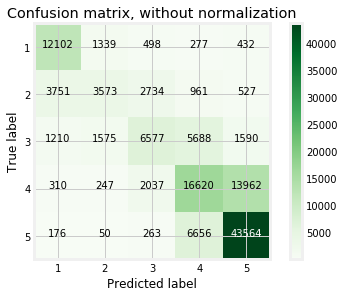

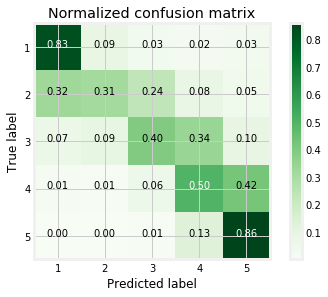

In [76]:
from sklearn import metrics
names = ['1','2','3','4','5']

confusion_matrix = metrics.confusion_matrix(y_test, LSVMpredictions)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, normalize=True, title='Normalized confusion matrix')

plt.show()

Lets make predictions for the whole dataset using the classifier that we trained 

In [77]:
X_null_train, X_full_test, y_null_train, y_full_test = train_test_split(vectors, df_reviews['stars'], test_size=0.999995, random_state=42, shuffle=False)

LSVMfullpredictions = LSVMclassifier.predict(X_full_test)

In [78]:
print("Actual Ratings: ")
print(y_full_test[-10:])
print("\nPredicted Ratings: ",end = "")
print(LSVMfullpredictions[-10:])

Actual Ratings: 
999981    4
999982    1
999984    4
999986    5
999988    3
999989    3
999992    5
999994    4
999996    5
999999    5
Name: stars, dtype: int64

Predicted Ratings: [4 1 5 4 3 4 5 4 4 5]


Lets save this to a new dataframe called df_LSVM_reviews. Before saving it lets make a copy of a reviews dataset since we need some modifications on the new dataset and we will need the original dataset later again. We create a copy of dataset and drop first 3 rows, since we couldnt predict ratings for the first 3 rows. After the copy is made change the real stars column with the predicted ones.

In [79]:
df_LSVM_reviews = df_reviews.copy()

df_LSVM_reviews.drop(df_LSVM_reviews.head(3).index, inplace=True)

df_LSVM_reviews['stars'] = LSVMfullpredictions

df_LSVM_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,cleared_text
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA,FOX Sports Grill,place gone hill clearly cut back staff food qu...
10,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,"Like walking back in time, every Saturday morn...",0,FIk4lQQu1eTe2EpzQ4xhBA,Pinball Hall Of Fame,like walking back time every saturday morning ...
11,mRUVMJkUGxrByzMQ2MuOpA,0,2017-12-15 23:27:08,1,-I5umRTkhw15RqpKMl_o1Q,1,"Walked in around 4 on a Friday afternoon, we s...",0,-mA3-1mN4JIEkqOtdbNXCQ,Beast of Bourbon Bar & Grill,walked around friday afternoon sat table bar w...
12,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw,Pazzo,wow surprised one two star reviews started ten...
14,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,Pho Phuong,cannot believe things changed years picked duc...
15,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw,Jz's Pizza,cant really find anything wrong place pastas p...
16,NyLYY8q1-H3hfsTwuwLPCg,0,2015-01-03 22:47:34,0,1wVA2-vQIuW_ClmXkDxqMQ,4,Great lunch today. Staff was very helpful in a...,0,86J5DwcFk4f4In1Vxe2TvA,Choolaah Indian BBQ,great lunch today staff helpful assisting sele...
17,cHdJXLlKNWixBXpDwEGb_A,1,2015-04-01 16:30:00,7,6BnQwlxRn7ZuWdzninM9sQ,3,I love chinese food and I love mexican food. W...,1,JSrP-dUmLlwZiI7Dp3PQ2A,Chino Bandido,love chinese food love mexican food go wrong c...
18,6lj2BJ4tJeu7db5asGHQ4w,0,2017-05-26 01:23:19,0,rEITo90tpyKmEfNDp3Ou3A,5,We've been a huge Slim's fan since they opened...,0,6Fz_nus_OG4gar721OKgZA,Slim Chickens,weve huge slims fan since opened one texas two...
19,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw,Indie Ale House,good selection classes beers mains ive twice f...


**Predicting Positive and Negative sentiments **

In [80]:
sentiments = []
for star in df_reviews['stars']:
    if star <= 3:
        sentiments.append('n')
    if star > 3:
        sentiments.append('p')

Splitting dataset into Train and test Data where 20% of data is going to be used for testing and 80% for training.

In [81]:
X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

Building Linear SVM model and train our classifier

In [82]:
LSVMclassifier2 = LinearSVC()

LSVMclassifier2.fit(X2_train, y2_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Making predictions

In [83]:
LSVMpredictions2 = LSVMclassifier2.predict(X2_test)

print("Actual Rating Category: ")
print(y2_test[:10])
print("\nPredicted Rating Category: ",end = "")
print(list(LSVMpredictions2[:10]))

Actual Rating Category: 
['n', 'p', 'p', 'p', 'n', 'p', 'p', 'p', 'n', 'p']

Predicted Rating Category: ['n', 'n', 'p', 'p', 'n', 'p', 'p', 'p', 'n', 'p']


Accuracy of the model

In [84]:
print('Accuracy score: ', accuracy_score(y2_test, LSVMpredictions2))

Accuracy score:  0.9127991855996338


Precision and Recall of the Model

In [85]:
print ('Precision: ' + str(precision_score(y2_test, LSVMpredictions2, average='weighted')))
print ('Recall: ' + str(recall_score(y2_test, LSVMpredictions2, average='weighted')))

Precision: 0.9123428318597104
Recall: 0.9127991855996338


Classification Report of the Model

In [86]:
print(classification_report(y2_test, LSVMpredictions2))

              precision    recall  f1-score   support

           n       0.90      0.84      0.87     43195
           p       0.92      0.95      0.94     83524

   micro avg       0.91      0.91      0.91    126719
   macro avg       0.91      0.89      0.90    126719
weighted avg       0.91      0.91      0.91    126719



Confusion Metrics

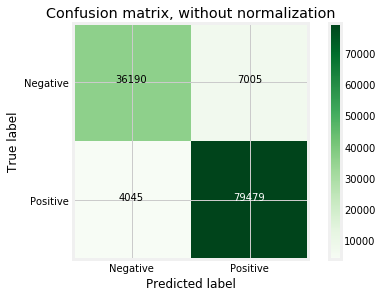

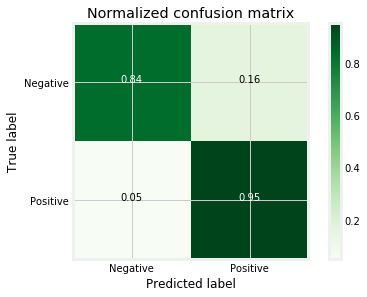

In [87]:
from sklearn import metrics
names = ['Negative','Positive']

confusion_matrix = metrics.confusion_matrix(y2_test, LSVMpredictions2)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, normalize=True, title='Normalized confusion matrix')

plt.show()

2. **Naive Bayes Algorithm**

* Naive Bayes Algorithm using (1,2,3,4 and 5 Ratings)

Selecting review text and rating from reviews dataset and make a copy of them, since we will vectorize the text, and the original dataset is needed again later.

In [88]:
x = df_reviews['text'].copy()
y = df_reviews['stars'].copy()

In [89]:
def text_preprocessing(text):
    no_punctuation = [ch for ch in text if ch not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [w for w in no_punctuation.split() if w.lower() not in stopwords]

Vectorization - Converting each review into a vector using bag-of-words approach

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(analyzer=text_preprocessing).fit(x)

x = vector.transform(x)

Splitting dataset into Train and test Data where 20% of data is going to be used for testing and 80% for training.

In [91]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle=False)

Building Multinomial Naive Bayes model and train our classifier

In [92]:
from sklearn.naive_bayes import MultinomialNB

NBclassifier = MultinomialNB()

NBclassifier.fit(X3_train, y3_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Making predictions

In [93]:
NBpredictions = NBclassifier.predict(X3_test)

print("Actual Ratings: ")
print(y3_test[:10])
print("Predicted Ratings: ",end = "")
print(NBpredictions[:10])

Actual Ratings: 
803417    2
803418    4
803419    5
803421    4
803422    3
803425    3
803426    2
803427    5
803428    2
803429    3
Name: stars, dtype: int64
Predicted Ratings: [2 4 5 3 1 5 5 4 2 4]


Accuracy of the model

In [94]:
print('Accuracy score: ', accuracy_score(y3_test, NBpredictions))

Accuracy score:  0.6097033594015104


Precision and Recall of the Model

In [95]:
print ('Precision: ' + str(precision_score(y3_test, NBpredictions, average='weighted')))
print ('Recall: ' + str(recall_score(y3_test, NBpredictions, average='weighted')))

Precision: 0.5920984029162744
Recall: 0.6097033594015104


Classification Report of the Model

In [96]:
print(classification_report(y3_test, NBpredictions))

              precision    recall  f1-score   support

           1       0.61      0.74      0.67     14648
           2       0.41      0.24      0.31     11546
           3       0.44      0.36      0.40     16640
           4       0.51      0.50      0.50     33176
           5       0.73      0.81      0.77     50709

   micro avg       0.61      0.61      0.61    126719
   macro avg       0.54      0.53      0.53    126719
weighted avg       0.59      0.61      0.60    126719



Confusion Metrics

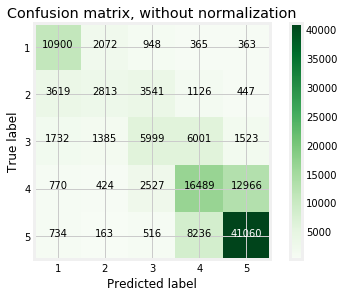

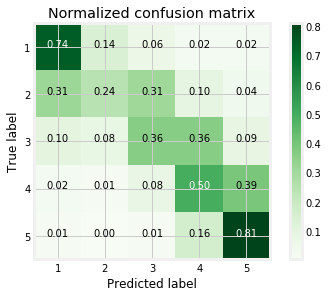

In [97]:
from sklearn import metrics
names = ['1','2','3','4','5']

confusion_matrix = metrics.confusion_matrix(y3_test, NBpredictions)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, normalize=True, title='Normalized confusion matrix')

plt.show()

Lets make predictions for the whole dataset using the classifier that we trained 

In [98]:
X3_null_train, X3_full_test, y3_null_train, y3_full_test = train_test_split(x, y, test_size=0.999995, random_state=0, shuffle=False)

NBfullpredictions = NBclassifier.predict(X3_full_test)

In [99]:
print("Actual Ratings: ")
print(y3_full_test[-10:])
print("\nPredicted Ratings: ",end = "")
print(NBfullpredictions[-10:])

Actual Ratings: 
999981    4
999982    1
999984    4
999986    5
999988    3
999989    3
999992    5
999994    4
999996    5
999999    5
Name: stars, dtype: int64

Predicted Ratings: [5 1 5 4 3 4 5 4 3 5]


Lets save this to a new dataframe called df_NB_reviews. Before saving it lets make a copy of a reviews dataset since we need some modifications on the new dataset and we will need the original dataset later again. We create a copy of dataset and drop first 3 rows, since we couldnt predict ratings for the first 3 rows. After the copy is made change the real stars column with the predicted ones.

In [100]:
df_NB_reviews = df_reviews.copy()

df_NB_reviews.drop(df_NB_reviews.head(3).index, inplace=True)

df_NB_reviews['stars'] = NBfullpredictions

df_NB_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,cleared_text
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA,FOX Sports Grill,place gone hill clearly cut back staff food qu...
10,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,5,"Like walking back in time, every Saturday morn...",0,FIk4lQQu1eTe2EpzQ4xhBA,Pinball Hall Of Fame,like walking back time every saturday morning ...
11,mRUVMJkUGxrByzMQ2MuOpA,0,2017-12-15 23:27:08,1,-I5umRTkhw15RqpKMl_o1Q,1,"Walked in around 4 on a Friday afternoon, we s...",0,-mA3-1mN4JIEkqOtdbNXCQ,Beast of Bourbon Bar & Grill,walked around friday afternoon sat table bar w...
12,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,5,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw,Pazzo,wow surprised one two star reviews started ten...
14,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,Pho Phuong,cannot believe things changed years picked duc...
15,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw,Jz's Pizza,cant really find anything wrong place pastas p...
16,NyLYY8q1-H3hfsTwuwLPCg,0,2015-01-03 22:47:34,0,1wVA2-vQIuW_ClmXkDxqMQ,5,Great lunch today. Staff was very helpful in a...,0,86J5DwcFk4f4In1Vxe2TvA,Choolaah Indian BBQ,great lunch today staff helpful assisting sele...
17,cHdJXLlKNWixBXpDwEGb_A,1,2015-04-01 16:30:00,7,6BnQwlxRn7ZuWdzninM9sQ,3,I love chinese food and I love mexican food. W...,1,JSrP-dUmLlwZiI7Dp3PQ2A,Chino Bandido,love chinese food love mexican food go wrong c...
18,6lj2BJ4tJeu7db5asGHQ4w,0,2017-05-26 01:23:19,0,rEITo90tpyKmEfNDp3Ou3A,5,We've been a huge Slim's fan since they opened...,0,6Fz_nus_OG4gar721OKgZA,Slim Chickens,weve huge slims fan since opened one texas two...
19,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,4,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw,Indie Ale House,good selection classes beers mains ive twice f...


* Naive Bayes Classifier using (1 and 5 Rating: Positive & Negative Reviews)

Lets classify Ratings from 1 to 3 as Negatives and Ratings from 4 to 5 as Positives

In [101]:
df_copied_reviews = df_reviews.copy()

df_copied_reviews['stars'][df_copied_reviews.stars == 3] = 1
df_copied_reviews['stars'][df_copied_reviews.stars == 2] = 1
df_copied_reviews['stars'][df_copied_reviews.stars == 4] = 5

Lets put them in respective variables rating1 and rating5

In [102]:
rating1 = df_copied_reviews[df_copied_reviews['stars'] == 1]

On the analysis section that we saw earlier, there are more positives ratings than negatives. Because of that the dataset is unbalanced. To make undersampling of the dataset lets check how many ratings are Negative and select the same amount for Positive.

In [103]:
len(rating1)

216737

Since there are 216737 Negative ratings from (1 to 3) lets also select only 216737 for Positive (4 and 5)

In [104]:
rating5 = df_copied_reviews[df_copied_reviews['stars'] == 5][0:216737]

In [105]:
frames = [rating1, rating5]
df_copied_reviews = pd.concat(frames)

In [106]:
x2 = df_copied_reviews['text']
y2 = df_copied_reviews['stars']

Vectorization - Converting each review into a vector using bag-of-words approach

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

vector2 = CountVectorizer(analyzer=text_preprocessing).fit(x2)

x2 = vector.transform(x2)

Splitting dataset into Train and test Data where 20% of data is going to be used for testing and 80% for training.

In [108]:
X4_train, X4_test, y4_train, y4_test = train_test_split(x2, y2, test_size=0.20, random_state=0)

Building Multinomial Naive Bayes model and train our classifier

In [109]:
NBclassifier2 = MultinomialNB()

NBclassifier2.fit(X4_train, y4_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Making predictions

In [110]:
NBpredictions2 = NBclassifier2.predict(X4_test)

print("Actual Rating Category: ")
print(y4_test[:10])
print("\nPredicted Rating Category: ",end = "")
print(list(NBpredictions2[:10]))

Actual Rating Category: 
179852    1
302679    5
221587    5
786164    1
521930    1
230530    1
32851     5
35712     5
334504    1
232863    5
Name: stars, dtype: int64

Predicted Rating Category: [5, 5, 5, 5, 1, 1, 5, 5, 1, 5]


Accuracy of the model

In [111]:
print('Accuracy score: ', accuracy_score(y4_test, NBpredictions2))

Accuracy score:  0.8613645538958418


Precison and Recall of the Model

In [112]:
print ('Precision: ' + str(precision_score(y4_test, NBpredictions2, average='weighted')))
print ('Recall: ' + str(recall_score(y4_test, NBpredictions2, average='weighted')))

Precision: 0.8631642422237666
Recall: 0.8613645538958418


Classification Report of the Model

In [113]:
print(classification_report(y4_test, NBpredictions2))

              precision    recall  f1-score   support

           1       0.89      0.83      0.86     43458
           5       0.84      0.90      0.87     43237

   micro avg       0.86      0.86      0.86     86695
   macro avg       0.86      0.86      0.86     86695
weighted avg       0.86      0.86      0.86     86695



Confusion Metrics

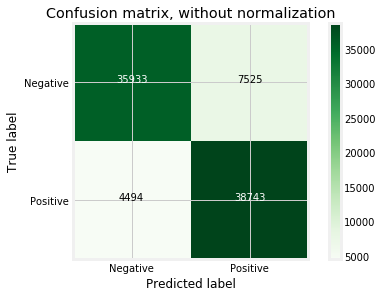

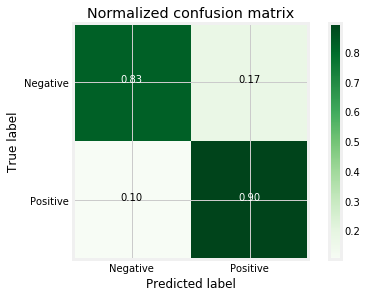

In [114]:
from sklearn import metrics
names = ['Negative','Positive']

confusion_matrix = metrics.confusion_matrix(y4_test, NBpredictions2)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=names, normalize=True, title='Normalized confusion matrix')

plt.show()

Check for df that are on memory and we dont need anymore so we free up some space

Lets see what we dont need anymore so we can delete them from Memory.

In [115]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_reviews', 899799734),
 ('df_LSVM_reviews', 899793104),
 ('df_NB_reviews', 899793104),
 ('df_copied_reviews', 634503393),
 ('rating1', 345539101),
 ('rating5', 288964316),
 ('df_businesses', 16673673),
 ('y', 10137496),
 ('y3_full_test', 10137448),
 ('y_full_test', 10137448),
 ('y3_train', 8109992),
 ('y_train', 8109992),
 ('y2', 6935608),
 ('y4_train', 5548488),
 ('sentiments', 5429648),
 ('LSVMfullpredictions', 5068808),
 ('NBfullpredictions', 5068808),
 ('y2_train', 4290016),
 ('y3_test', 2027528),
 ('y_test', 2027528),
 ('y4_test', 1387144),
 ('y2_test', 1043560),
 ('LSVMpredictions', 1013848),
 ('NBpredictions', 1013848),
 ('NBpredictions2', 693656),
 ('LSVMpredictions2', 506972),
 ('STOPWORDS', 8416),
 ('stopwords', 8416),
 ('TfidfVectorizer', 2000),
 ('WordCloud', 2000),
 ('i', 1672),
 ('CountVectorizer', 1464),
 ('LinearSVC', 1464),
 ('MultinomialNB', 1184),
 ('TextBlob', 1184),
 ('AngularAxis', 1056),
 ('Annotation', 1056),
 ('Annotations', 1056),
 ('Area', 1056),
 ('Bar'

In [116]:
del df_copied_reviews,rating1,rating5,sentiments,TfidfVectorizer,CountVectorizer,LinearSVC,MultinomialNB,accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,vectors,vector,vector2,y,y2,y_test,y2_test,y3_test,y4_test,y_full_test,y3_full_test,y_train,y2_train,y3_train,y4_train,y_null_train,y3_null_train,LSVMpredictions,LSVMpredictions2,LSVMfullpredictions,NBpredictions,NBpredictions2,NBfullpredictions,LSVMclassifier,LSVMclassifier2,NBclassifier,NBclassifier2,x,x2,X_test,X2_test,X3_test,X4_test,X_full_test,X3_full_test,X_train,X2_train,X3_train,X4_train,X_null_train,X3_null_train
gc.collect()

26082

In [117]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df_reviews', 899799734),
 ('df_LSVM_reviews', 899793104),
 ('df_NB_reviews', 899793104),
 ('df_businesses', 16673673),
 ('STOPWORDS', 8416),
 ('stopwords', 8416),
 ('WordCloud', 2000),
 ('i', 1672),
 ('TextBlob', 1184),
 ('AngularAxis', 1056),
 ('Annotation', 1056),
 ('Annotations', 1056),
 ('Area', 1056),
 ('Bar', 1056),
 ('Barpolar', 1056),
 ('Box', 1056),
 ('Candlestick', 1056),
 ('Carpet', 1056),
 ('Choropleth', 1056),
 ('ColorBar', 1056),
 ('Cone', 1056),
 ('Contour', 1056),
 ('Contourcarpet', 1056),
 ('Contours', 1056),
 ('Counter', 1056),
 ('Data', 1056),
 ('ErrorX', 1056),
 ('ErrorY', 1056),
 ('ErrorZ', 1056),
 ('Figure', 1056),
 ('FigureWidget', 1056),
 ('Font', 1056),
 ('Frame', 1056),
 ('Frames', 1056),
 ('Heatmap', 1056),
 ('Heatmapgl', 1056),
 ('Histogram', 1056),
 ('Histogram2d', 1056),
 ('Histogram2dContour', 1056),
 ('Histogram2dcontour', 1056),
 ('Isosurface', 1056),
 ('Layout', 1056),
 ('Legend', 1056),
 ('Line', 1056),
 ('Margin', 1056),
 ('Marker', 1056),
 ('Mesh

# Recommendation Algorithms

**1. Collaborative Filtering**

Importing the libraries

In [118]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

Prediction Function

In [119]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_difference = (ratings - mean_user_rating[:, np.newaxis])
        prediction = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_difference) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        prediction = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return prediction

Root Mean Square Error Algorithm

In [120]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

Mean Absolute Error Algorithm

In [121]:
def mae(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_absolute_error(prediction, ground_truth)

Collaborative Filtering Algorithm

Due to Memory Error I am using just 4200 reviews for 1,3,4,5 stars rated and 2500 for 2 stars rated 

In [122]:
def collaborativeFiltering(dataset):
    reviews_dataframe = dataset.copy()

    print("Starting undersampling of the dataset")
    
    # Undersampling the dataset to get a balanced dataset
    rating1 = reviews_dataframe[reviews_dataframe['stars'] == 1][0:4000]
    rating2 = reviews_dataframe[reviews_dataframe['stars'] == 2][0:2500]
    rating3 = reviews_dataframe[reviews_dataframe['stars'] == 3][0:4000]
    rating4 = reviews_dataframe[reviews_dataframe['stars'] == 4][0:4000]
    rating5 = reviews_dataframe[reviews_dataframe['stars'] == 5][0:4000]
    frames = [rating1, rating2, rating3, rating4, rating5]
    reviews_dataframe = pd.concat(frames)
    
    print("Completed undersampling the dataset")
    
    # converting user_id and business_id to integers for the matrix
    reviews_dataframe['user_id'] = pd.factorize(reviews_dataframe.user_id)[0]
    reviews_dataframe['business_id'] = pd.factorize(reviews_dataframe.business_id)[0]
    
    # getting the number unique users and restaurants
    unique_users = reviews_dataframe.user_id.unique().shape[0]
    unique_restaurants = reviews_dataframe.business_id.unique().shape[0]
    
    train_data, test_data = train_test_split(reviews_dataframe, test_size=0.2)
    
    #Create two user-item matrices, one for training and another for testing
    train_data_matrix = np.zeros((unique_users, unique_restaurants))
    
    print("Starting creation of user-item matrix")
    
    # train_data_matrix
    for line in train_data.itertuples():
         train_data_matrix[line[9], line[1]] = line[6]
            
    # test_data_matrix
    test_data_matrix = np.zeros((unique_users, unique_restaurants))
    for line in test_data.itertuples():
        test_data_matrix[line[9], line[1]] = line[6]
    
    print("Completed creating user-item matrix")
    
    
    print("Starting creation of similarity matrix")
    
    # similarity between users and items
    user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
    item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')
    
    print("Completed creating similarity matrix")
    
    
    print("Starting creation of prediction matrix")
    
    item_prediction = predict(train_data_matrix, item_similarity, type='item')
    user_prediction = predict(train_data_matrix, user_similarity, type='user')
    
    print("Completed creating prediction matrix")
    
    
    print('Printing the RMSE and MAE' + '\n')
    
    if dataset.equals(df_reviews):
        rating_type = 'biased rating'
    elif dataset.equals(df_LSVM_reviews):
        rating_type = 'unbiased rating for Linear SVM Dataframe'
    else:
        rating_type = 'unbiased rating for Naive Bayes Dataframe'
    
    print('Root Mean Square Error while testing the model using ' + rating_type)
    print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
    print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)) + '\n')

    print('Root Mean Square Error while training the model using ' + rating_type)
    print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
    print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)) + '\n')
    
    print('Mean Absolute Error while testing the model using ' + rating_type)
    print('User-based CF MAE: ' + str(mae(user_prediction, test_data_matrix)))
    print('Item-based CF MAE: ' + str(mae(item_prediction, test_data_matrix)) + '\n')

    print('Mean Absolute Error while training the model using ' + rating_type)
    print('User-based CF MAE: ' + str(mae(user_prediction, train_data_matrix)))
    print('Item-based CF MAE: ' + str(mae(item_prediction, train_data_matrix)) + '\n')

Collaborative filtering for original Reviews dataset

In [123]:
collaborativeFiltering(df_reviews)

Starting undersampling of the dataset
Completed undersampling the dataset
Starting creation of user-item matrix
Completed creating user-item matrix
Starting creation of similarity matrix
Completed creating similarity matrix
Starting creation of prediction matrix
Completed creating prediction matrix
Printing the RMSE and MAE

Root Mean Square Error while testing the model using biased rating
User-based CF RMSE: 3.392834962728466
Item-based CF RMSE: 3.3955723356155345

Root Mean Square Error while training the model using biased rating
User-based CF RMSE: 3.40278509605068
Item-based CF RMSE: 3.4033157993876437

Mean Absolute Error while testing the model using biased rating
User-based CF MAE: 3.0754293883748827
Item-based CF MAE: 3.0782417048283546

Mean Absolute Error while training the model using biased rating
User-based CF MAE: 3.0825566582166544
Item-based CF MAE: 3.0829451840049322



Collaborative filtering for Linear SVM Reviews dataset

In [124]:
collaborativeFiltering(df_LSVM_reviews)

Starting undersampling of the dataset
Completed undersampling the dataset
Starting creation of user-item matrix
Completed creating user-item matrix
Starting creation of similarity matrix
Completed creating similarity matrix
Starting creation of prediction matrix
Completed creating prediction matrix
Printing the RMSE and MAE

Root Mean Square Error while testing the model using unbiased rating for Linear SVM Dataframe
User-based CF RMSE: 3.425245547316502
Item-based CF RMSE: 3.4279671903989772

Root Mean Square Error while training the model using unbiased rating for Linear SVM Dataframe
User-based CF RMSE: 3.394776344747913
Item-based CF RMSE: 3.3953170528221777

Mean Absolute Error while testing the model using unbiased rating for Linear SVM Dataframe
User-based CF MAE: 3.10888583590835
Item-based CF MAE: 3.111747022322395

Mean Absolute Error while training the model using unbiased rating for Linear SVM Dataframe
User-based CF MAE: 3.0742569605731984
Item-based CF MAE: 3.074654714384

Collaborative filtering for Naive Bayes Reviews dataset

In [125]:
collaborativeFiltering(df_NB_reviews)

Starting undersampling of the dataset
Completed undersampling the dataset
Starting creation of user-item matrix
Completed creating user-item matrix
Starting creation of similarity matrix
Completed creating similarity matrix
Starting creation of prediction matrix
Completed creating prediction matrix
Printing the RMSE and MAE

Root Mean Square Error while testing the model using unbiased rating for Naive Bayes Dataframe
User-based CF RMSE: 3.3775945404646075
Item-based CF RMSE: 3.380423345989919

Root Mean Square Error while training the model using unbiased rating for Naive Bayes Dataframe
User-based CF RMSE: 3.406445536410101
Item-based CF RMSE: 3.4069991792149104

Mean Absolute Error while testing the model using unbiased rating for Naive Bayes Dataframe
User-based CF MAE: 3.049844026900708
Item-based CF MAE: 3.0528421083234925

Mean Absolute Error while training the model using unbiased rating for Naive Bayes Dataframe
User-based CF MAE: 3.088750245908081
Item-based CF MAE: 3.0891610

In [126]:
del df_LSVM_reviews,df_NB_reviews
gc.collect()

206